In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as met
import sklearn.feature_selection as fs # Memilih feature yang terbaik untuk meningkatkan akurasi model
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("calonpembeli_ch5.csv")
data

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [3]:
# data.isna().sum().to_frame() # Cek apakah ada data kosong
data.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [4]:
data = data[(data["Usia"] <= 100)]
data.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [5]:
# data["Beli_Mobil"].value_counts().to_frame()
data

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [17]:
X = data.iloc[:, 1:6]
y = data["Beli_Mobil"]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
model = lm.LogisticRegression()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test) 
print(r2)

0.955


In [7]:
print(f"Nilai Slope/Gradien = {model.coef_}")
print(f"Nilai Intercept/Koefisien = {model.intercept_}")

Nilai Slope/Gradien = [[-0.01594353 -0.17093139 -1.03941692  0.07720503  0.05686694]]
Nilai Intercept/Koefisien = [-11.07796217]


In [8]:
# x1 = np.array([19,0,0,0,500]).reshape(1, -1)
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [9]:
con_matrix = met.confusion_matrix(y_test, y_pred)
con_matrix

array([[ 59,   4],
       [  5, 132]])

In [10]:
prec = met.precision_score(y_test, y_pred)
print(prec)

0.9705882352941176


In [11]:
auc = met.roc_auc_score(y_test, y_pred)
print(auc)

0.9500057930714866


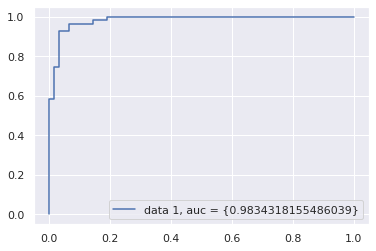

In [12]:
y_pred_proba = model.predict_proba(X_test)[::, 1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label="data 1, auc = {%s}" %(str(auc)))
plt.legend(loc=4)
plt.show()

In [13]:
rfe = fs.RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print("Support = ", rfe.support_)
print("Ranking = ", rfe.ranking_)

Support =  [False  True  True False  True]
Ranking =  [3 1 1 2 1]


<AxesSubplot:>

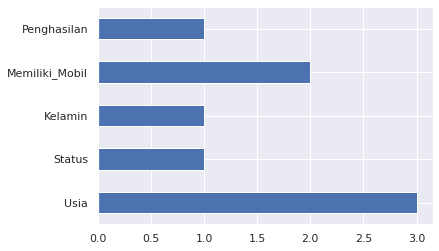

In [14]:
pd.Series(rfe.ranking_, X.columns).plot(kind="barh")

<AxesSubplot:>

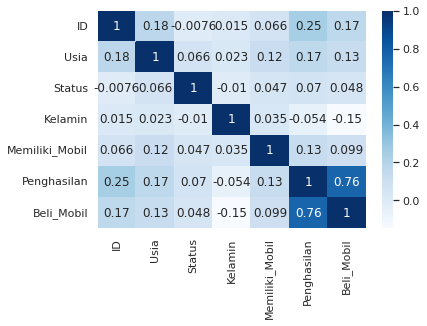

In [15]:
sns.heatmap(data.corr(), cmap="Blues", annot=True)